# Physics 512 -  Problem Set 1

Kit M. Gerodias

In [4]:
# [ IMPORT modules ]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

# Problem No. 1


see pdf

Solving for coefficients
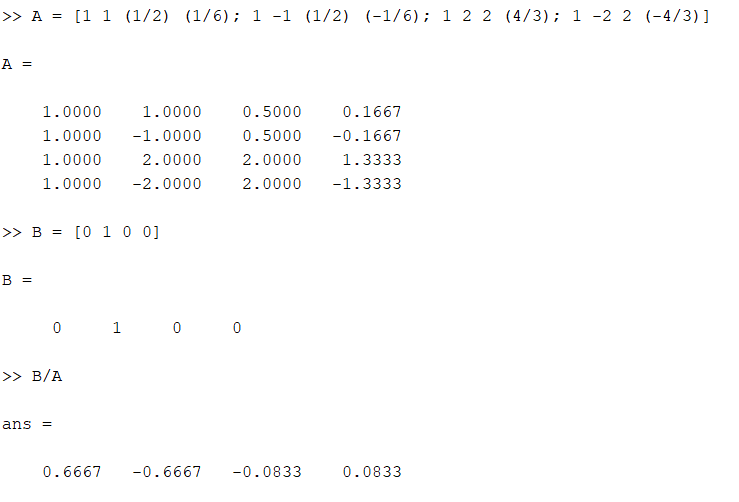
Thus, c1 = 2/3, c2 = -2/3, c3 = -1/12, c4 = 1/12

In [46]:
# [ Estimate of the First Derivative ]
def fprime(func, x, D):
    # 'D' is the Greek delta
    return ((2/3)*(func(x + D) - func(x - D)) - (1/12)*(func(x + 2*D) - func(x - 2*D))) / D

# [ function 2 ]
def exp_001Func(x):
    return np.exp(0.01*x)

#[ Greek delta, D ]
D = np.linspace (1e-5, 1, 10000)

In [18]:
print('My Machine Precision is '+str(np.finfo(float).eps))

My Machine Precision is 2.220446049250313e-16


More info for truncation errors:
http://dewan.buet.ac.bd/EEE423/CourseMaterials/TaylorSeries.pdf
https://fac.ksu.edu.sa/sites/default/files/numerical_analysis_9th.pdf

Machine precision:https://en.wikipedia.org/wiki/Machine_epsilon

Optimal Error for e^x: 1.21e-03


Text(0, 0.5, 'Error')

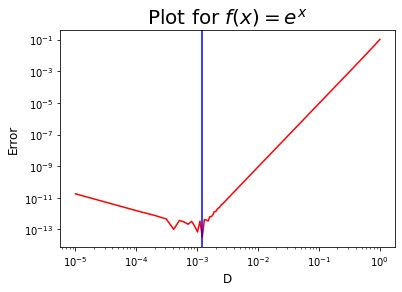

In [98]:
# [ For function e^x ]

x = 1
taylored = fprime(np.exp, x, D)
# derivative of f is e^x
truth = np.exp(x)
absError = np.abs(taylored - truth)

#optimal error
optimal_D1 = D[np.argmin(absError)]
print("Optimal Error for e^x: {:.2e}".format(optimal_D1))

#plotting
plt.plot(D,absError,c="r")
plt.axvline(optimal_D1, c='b')
plt.xscale("log")
plt.yscale("log")
plt.title("Plot for $f(x)=e^{x}$", fontsize = 20, loc='center')
plt.xlabel("D", fontsize = 12)
plt.ylabel("Error", fontsize = 12)

Optimal Error for e^0.01x: 4.43e-02


Text(0, 0.5, 'Error')

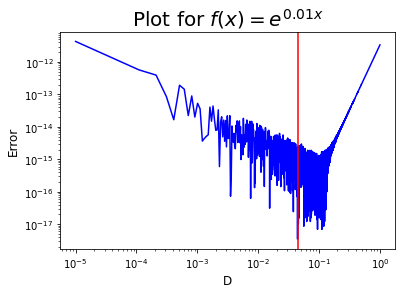

In [99]:
# [ For function e^(0.01x) ]

x = 1
taylored2 = fprime(exp_001Func, x, D)
# derivative of f is e^x
truth2 = 0.01*np.exp(0.01*x)
absError2 = np.abs(taylored2 - truth2)

#optimal error
optimal_D2 = D[np.argmin(absError2)]
print("Optimal Error for e^0.01x: {:.2e}".format(optimal_D2))

#plotting
plt.plot(D,absError2,c="b")
plt.axvline(optimal_D2, c='r')
plt.xscale("log")
plt.yscale("log")
plt.title("Plot for $f(x)=e^{0.01x}$", fontsize = 20, loc='center')
plt.xlabel("D", fontsize = 12)
plt.ylabel("Error", fontsize = 12)

Estimates of the optimal D for both functions are roughly correct.

# Problem No. 2

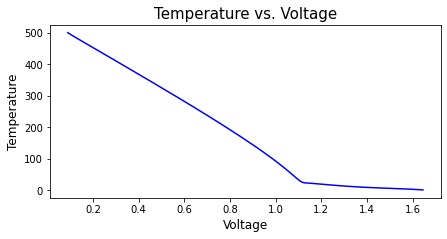

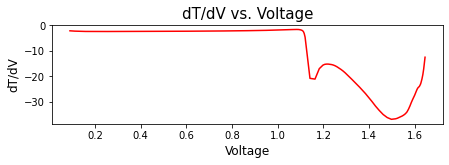

In [71]:
# [ IMPORT Data ]

#Load Data
df = pd.read_csv("lakeshore.csv", header = None)
temperature = df[0]
voltage = df[1]
dT_by_dV = df[2]

#plotting
#first figure
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.plot(voltage,temperature,c='b')
plt.xlabel("Voltage", fontsize = 12)
plt.ylabel("Temperature", fontsize = 12)
plt.title("Temperature vs. Voltage", fontsize = 15, loc='center')
#second figure
plt.figure(figsize=(7,4))
plt.subplot(2,1,2)
plt.plot(voltage,dT_by_dV,c='r')
plt.title("dT/dV vs. Voltage", fontsize = 15, loc='center')
plt.xlabel("Voltage", fontsize = 12)
plt.ylabel("dT/dV", fontsize = 12)
plt.show()

In [47]:
# [ Cubic Spline ]

df = df.iloc[::-1] #sorts the data to increasing voltage
temperature = df[0]
voltage = df[1]
dT_by_dV = df[2]
cubicSpline = interpolate.CubicSpline(voltage, temperature)


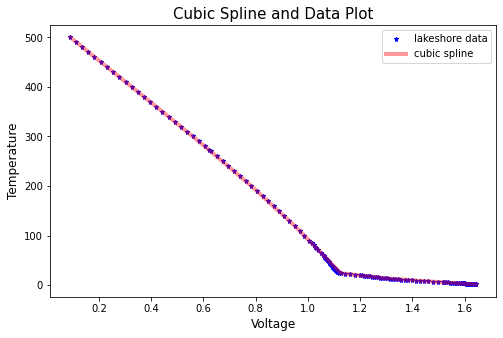

In [84]:
interpVoltage = np.linspace(min(voltage), max(voltage), 10)
interpTemperature = cubicSpline(interpVoltage)

#plotting
plt.figure(figsize=(8,5))
plt.plot(voltage,temperature,'*',c = "b",label="lakeshore data",markersize=5)
plt.plot(interpVoltage,interpTemperature,c="r",label="cubic spline",alpha = 0.4,lw=4)
plt.title("Cubic Spline and Data Plot", fontsize = 15, loc='center')
plt.xlabel("Voltage",fontsize=12)
plt.ylabel("Temperature",fontsize=12)
plt.legend()
plt.show()

In [130]:
# [ Error Estimate ]
#interpolated odd points
oddTemp = df.iloc[::2,0]
oddVolt = df.iloc[::2,1]
CubicSpline = interpolate.CubicSpline(oddVolt,oddTemp)

#Rough Error
#using interpolated odd points 

err = np.std(CubicSpline(df.iloc[1::2,1])-df.iloc[1::2,0])
print("Error: {:.3e}".format(err) + " K")

Error: 2.345e-02 K


# Problem No. 3

In [225]:
# Rational functions from class 

def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    #pars=np.dot(np.linalg.inv(mat),y)
    pars=np.dot(np.linalg.pinv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q


In [226]:
#using code from class

#define points
setFunc = 1 #for cosine function, any number if otherwise
if setFunc == 2:
    start = -np.pi/2
    end = np.pi/2
else:
    start = -1
    end = 1
n = 4
m = 5
#define functions and array

funcCos = np.cos

x = np.linspace(start, end, n + m - 1)
#y = funcCos(x)
y = 1.0 / (1.0 + x**2)
xx=np.linspace(x[0], x[-1], 1001)
#y_true = funcCos(xx)
y_true = 1.0 / (1.0 + xx**2)

    
# [ POLYNOMIAL ]  

pp = np.polyfit( x, y, n + m - 1)
yy_poly = np.polyval(pp,xx)
err_poly = np.std(yy_poly - y_true)


# [ CUBIC SPLINE ]

cubicSpline = interpolate.splrep(x, y)
yy_spline = interpolate.splev(xx,cubicSpline)
err_spline = np.std(yy_spline - y_true)
# [ RATIONAL ]

p,q = rat_fit(x,y,n,m)
yy_rat = rat_eval(p,q,xx)
err_rat = np.std(yy_rat - y_true)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RankWarning: Polyfit may be poorly conditioned


p:  [ 1.00000015e+00  0.00000000e+00 -4.05284793e-01  3.63797881e-12]
q:  [ 7.27595761e-12  9.47208622e-02  0.00000000e+00  5.66317759e-03
 -2.84217094e-14  3.25807335e-04]


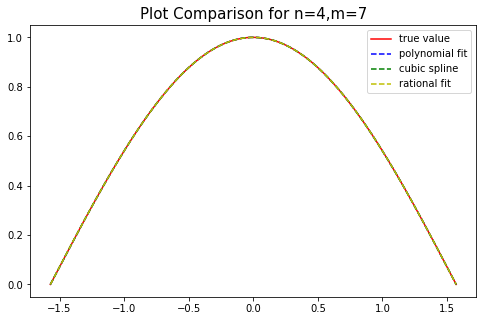

In [199]:
#plotting for Cosine
plt.figure(figsize=(8,5))
plt.plot(xx, y_true, label = "true value",c='r')
plt.plot(xx,yy_poly, label = "polynomial fit", ls='--',c='b')
plt.plot(xx,yy_spline, label = "cubic spline", ls='--',c='g')
plt.plot(xx,yy_rat, label = "rational fit", ls='--',c='y')
plt.title("Plot Comparison for n={},m={}".format(n,m), fontsize = 15, loc='center')
plt.legend()
print("p: ",p)
print("q: ",q)

Polynomial RMS = 8.83e-05
Cubic Spline RMS = 5.48e-05
Rational RMS = 1.57e-06


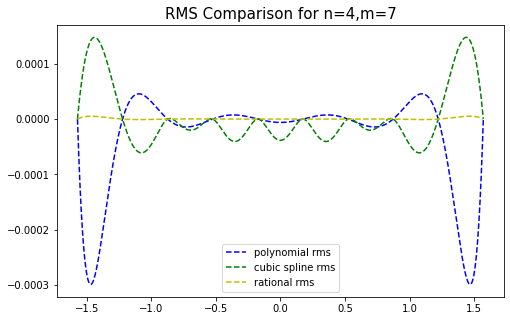

In [200]:
#plotting for Cosine
plt.figure(figsize=(8,5))
#plt.plot(xx, y_true, label = "true value",c='r')
plt.plot(xx,yy_poly - y_true, label = "polynomial rms", ls='--',c='b')
plt.plot(xx,yy_spline - y_true, label = "cubic spline rms", ls='--',c='g')
plt.plot(xx,yy_rat - y_true, label = "rational rms", ls='--',c='y')
plt.title("RMS Comparison for n={,m={}".format(n,m), fontsize = 15, loc='center')
plt.legend()
print("Polynomial RMS = {:.2e}".format(err_poly))
print("Cubic Spline RMS = {:.2e}".format(err_spline))
print("Rational RMS = {:.2e}".format(err_rat))

p:  [-1.98955538 -5.         -1.          1.25      ]
q:  [-4.50000000e+00 -1.00000000e+00 -2.00000000e+00 -1.00000000e+00
  7.50000000e-01 -3.55271368e-15]


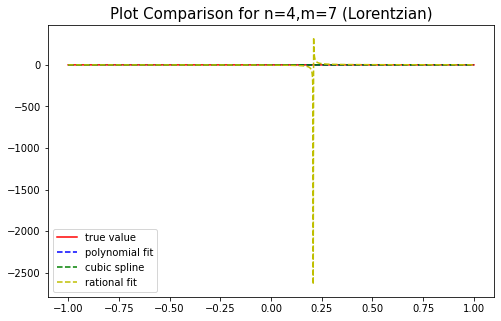

In [219]:
#plotting for Lorentzian
#using np.linalg.inv
plt.figure(figsize=(8,5))
plt.plot(xx, y_true, label = "true value",c='r')
plt.plot(xx,yy_poly, label = "polynomial fit", ls='--',c='b')
plt.plot(xx,yy_spline, label = "cubic spline", ls='--',c='g')
plt.plot(xx,yy_rat, label = "rational fit", ls='--',c='y')
plt.title("Plot Comparison for n={},m={} (Lorentzian)".format(n,m), fontsize = 15, loc='center')
plt.legend()
print("p: ",p)
print("q: ",q)

Polynomial RMS = 1.32e-03
Cubic Spline RMS = 1.82e-04
Rational RMS = 8.52e+01


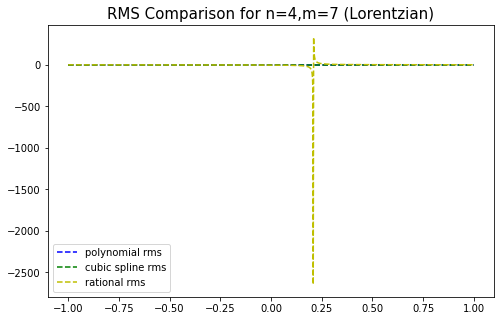

In [220]:
#plotting
#using np.linalg.inv
plt.figure(figsize=(8,5))
#plt.plot(xx, y_true, label = "true value",c='r')
plt.plot(xx,yy_poly - y_true, label = "polynomial rms", ls='--',c='b')
plt.plot(xx,yy_spline - y_true, label = "cubic spline rms", ls='--',c='g')
plt.plot(xx,yy_rat - y_true, label = "rational rms", ls='--',c='y')
plt.title("RMS Comparison for n={},m={} (Lorentzian)".format(n,m), fontsize = 15, loc='center')
plt.legend()
print("Polynomial RMS = {:.2e}".format(err_poly))
print("Cubic Spline RMS = {:.2e}".format(err_spline))
print("Rational RMS = {:.2e}".format(err_rat))


p:  [ 1.00000000e+00  1.77635684e-15 -3.33333333e-01  0.00000000e+00]
q:  [ 0.00000000e+00  6.66666667e-01 -1.77635684e-15 -3.33333333e-01]


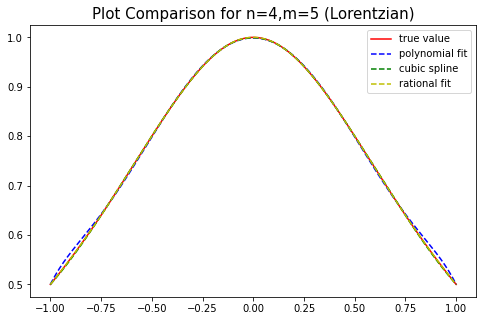

In [227]:
#plotting for Lorentzian
#using np.linalg.pinv
plt.figure(figsize=(8,5))
plt.plot(xx, y_true, label = "true value",c='r')
plt.plot(xx,yy_poly, label = "polynomial fit", ls='--',c='b')
plt.plot(xx,yy_spline, label = "cubic spline", ls='--',c='g')
plt.plot(xx,yy_rat, label = "rational fit", ls='--',c='y')
plt.title("Plot Comparison for n={},m={} (Lorentzian)".format(n,m), fontsize = 15, loc='center')
plt.legend()
print("p: ",p)
print("q: ",q)

Polynomial RMS = 4.14e-03
Cubic Spline RMS = 6.75e-04
Rational RMS = 1.12e-15


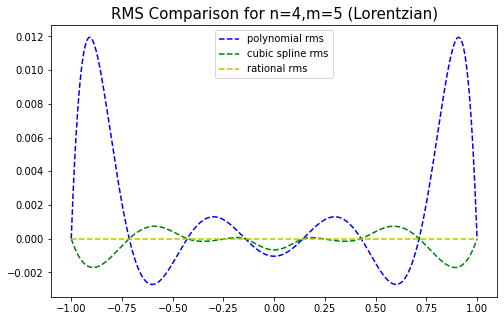

In [228]:
#plotting
#using np.linalg.pinv
plt.figure(figsize=(8,5))
#plt.plot(xx, y_true, label = "true value",c='r')
plt.plot(xx,yy_poly - y_true, label = "polynomial rms", ls='--',c='b')
plt.plot(xx,yy_spline - y_true, label = "cubic spline rms", ls='--',c='g')
plt.plot(xx,yy_rat - y_true, label = "rational rms", ls='--',c='y')
plt.title("RMS Comparison for n={},m={} (Lorentzian)".format(n,m), fontsize = 15, loc='center')
plt.legend()
print("Polynomial RMS = {:.2e}".format(err_poly))
print("Cubic Spline RMS = {:.2e}".format(err_spline))
print("Rational RMS = {:.2e}".format(err_rat))


The pseudoinverse of a matrix will only approximate a solution or give the best fit. That's why when we use np.linalg.pinv, it will not obtain a more exact solution. The relatively larger p,q coefficients must be due to the singularity.